<a href="https://colab.research.google.com/github/kkl-oop/dplearning/blob/main/baseregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
'''
回归的目的是预测出如价格或概率这样连续值得输出。相对于分类问题，分类的目的是从一系列
的分类出选择出一个分类（例如给出一张包含苹果或橘子的图片，识别出图片中是哪种水果）
'''
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


In [13]:
# 获取数据集
dataset_path = keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [28]:
# 使用panda导入数据集
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
         'Acceleration','Model Yeal','Origin']
raw_dataset = pd.read_csv(dataset_path,names=column_names,
              na_values="?",comment='\t',
              sep=" ",skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Yeal,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# 数据清洗
dataset.isna().sum()

In [35]:
# 删除不全的行
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Yeal,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# origin表示代表分类，转为独热码
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin==2)*1.0
dataset['Japan'] = (origin==3)*1.0
dataset.tail()

In [36]:
# 拆分训练数据及和测试数据集，最后使用测试数据集对模型进行评估
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()
test_dataset.tail

<bound method NDFrame.tail of       MPG  Cylinders  Displacement  ...  Acceleration  Model Yeal  Origin
9    15.0          8         390.0  ...           8.5          70       1
25   10.0          8         360.0  ...          14.0          70       1
28    9.0          8         304.0  ...          18.5          70       1
31   25.0          4         113.0  ...          14.0          71       3
33   19.0          6         232.0  ...          13.0          71       1
..    ...        ...           ...  ...           ...         ...     ...
369  34.0          4         112.0  ...          18.0          82       1
375  36.0          4         105.0  ...          15.3          82       2
382  34.0          4         108.0  ...          16.9          82       3
384  32.0          4          91.0  ...          15.7          82       3
396  28.0          4         120.0  ...          18.6          82       1

[78 rows x 8 columns]>

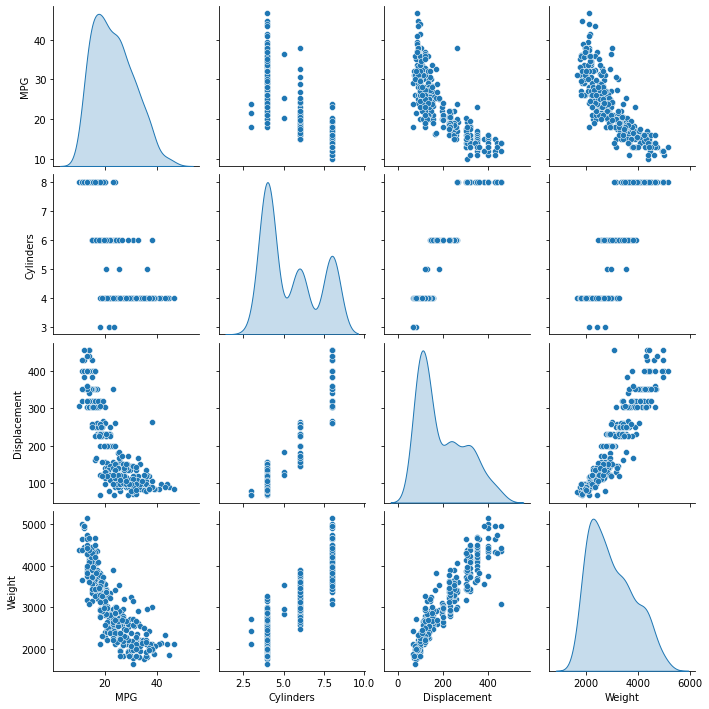

In [31]:
# 数据检查
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind="kde")
sns.pairplot()

In [37]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Yeal,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [38]:
# 从标签中分离特征
train_labels = train_dataset.pop('MPG')
test_label = test_dataset.pop('MPG')
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [40]:
# 构建模型
def build_model():
  model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
  return model


model = build_model()

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 数据规范化
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_test_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Yeal,Origin
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,-0.715676
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,-0.715676
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,-0.715676
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,1.781239
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,-0.715676
...,...,...,...,...,...,...,...
369,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094,-0.715676
375,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094,0.532781
382,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094,1.781239
384,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094,1.781239


In [49]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.03057487],
       [-0.04849586],
       [ 0.18147498],
       [-0.08850516],
       [-0.23550089],
       [ 0.08543608],
       [-0.22532116],
       [-0.22227095],
       [ 0.13980114],
       [-0.05926005]], dtype=float32)

In [52]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch%100 == 0:print('')
    print('.',end='')

EPOCHS=1000
history = model.fit(
    normed_train_data,train_labels,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[PrintDot()]
)



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [57]:
hist = pd.DataFrame(history.history)
hist
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
0,579.050232,22.707321,579.050232,579.715820,22.620237,579.715820
1,539.925964,21.747440,539.925964,536.928528,21.558077,536.928589
2,498.638092,20.688089,498.638092,489.088776,20.319172,489.088776
3,451.001648,19.432262,451.001648,435.307648,18.870237,435.307648
4,398.112854,17.980604,398.112854,376.386536,17.252716,376.386536
...,...,...,...,...,...,...
995,2.596395,1.050609,2.596395,9.787908,2.380417,9.787908
996,2.356554,0.951255,2.356554,9.624354,2.355411,9.624354
997,2.584077,1.047139,2.584077,9.932218,2.384928,9.932218
998,2.484331,0.963540,2.484331,9.756503,2.360739,9.756503


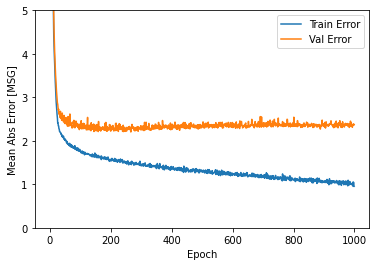

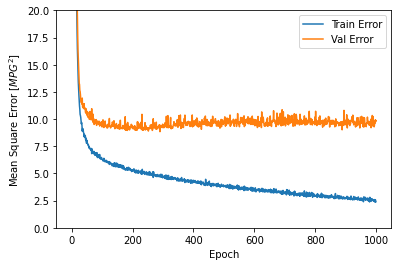

In [63]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MSG]')
  plt.plot(hist['epoch'],hist['mae'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mae'],label='Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'],hist['mse'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label='Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


............................................................................

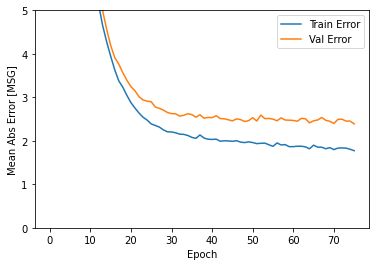

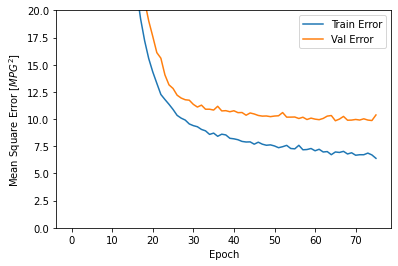

In [65]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(normed_train_data,train_labels,epochs=EPOCHS,
           validation_split=0.2,verbose=0,callbacks=[early_stop,PrintDot()])
plot_history(history)

In [68]:
loss,mae,mse=model.evaluate(normed_test_data,test_label,verbose=2)
print("Testing set Mean Abs Error: {:5.2f}MPG".format(mae))

3/3 - 0s - loss: 8.3877 - mae: 2.2645 - mse: 8.3877
Testing set Mean Abs Error:  2.26MPG


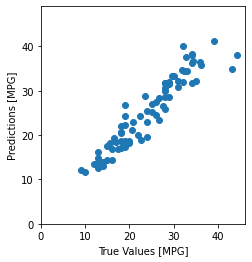

In [73]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_label,test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,1000])

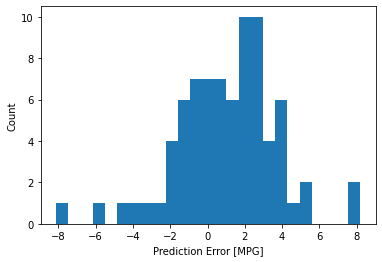

In [76]:
error = test_predictions-test_label
plt.hist(error,bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
'''
本笔记本 (notebook) 介绍了一些处理回归问题的技术。

均方误差（MSE）是用于回归问题的常见损失函数（分类问题中使用不同的损失函数）。
类似的，用于回归的评估指标与分类不同。 常见的回归指标是平均绝对误差（MAE）。
当数字输入数据特征的值存在不同范围时，每个特征应独立缩放到相同范围。
如果训练数据不多，一种方法是选择隐藏层较少的小网络，以避免过度拟合。
早期停止是一种防止过度拟合的有效技术
'''